### 5. 머신러닝


#### 5.1 클러스터링 (카테고리별 군집화)
활용 목표
- 비슷한 제품끼리 묶어 각 카테고리별 시장 트렌드 분석  
- 군집별 특성을 기반으로 마케팅 전략 수립  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

In [99]:
제품 = pd.read_csv('제품_정제완료_250212.csv')
제품.head()

,카테고리,브랜드,제품명,가격,총평점,총 리뷰 수
0,로션,에스트라,에스트라 아토베리어365 로션 150ml 리필 기획,38000,4.9,2494
1,로션,포엘리에,포엘리에 옴므 5 IN 1 미백 주름 기능성 올인원 남자 로션 150ml,15500,4.9,154
2,로션,온그리디언츠,온그리디언츠 스킨 베리어 카밍 로션 기획,30510,4.9,3100
3,로션,아이디얼포맨,아이디얼포맨 퍼펙트 올인원 토트넘 홋스퍼 에디션,28310,4.9,3810
4,로션,아이디얼포맨,아이디얼포맨 올인원 토트넘 홋스퍼 에디션 2종,28310,4.9,4408


In [100]:
제품.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    3168 non-null   object 
 1   브랜드     3168 non-null   object 
 2   제품명     3168 non-null   object 
 3   가격      3168 non-null   int64  
 4   총평점     3168 non-null   float64
 5   총 리뷰 수  3168 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 148.6+ KB


In [101]:
제품['제품명'].duplicated().sum()

np.int64(7)

In [102]:
제품[제품.duplicated(subset=['제품명'], keep=False)].sort_values(by=['제품명'])

,카테고리,브랜드,제품명,가격,총평점,총 리뷰 수
1872,에센스&세럼&앰플,CKD,CKD 레티노콜라겐 저분자 300 집중크림 25ml,19900,4.8,21
2335,크림,CKD,CKD 레티노콜라겐 저분자 300 집중크림 25ml,19900,4.8,21
110,로션,달팡,달팡 인트랄 액티브 스태빌라이징 로션 100ml,91800,4.5,8
1880,에센스&세럼&앰플,달팡,달팡 인트랄 액티브 스태빌라이징 로션 100ml,91800,4.5,8
1877,에센스&세럼&앰플,더마픽스,더마픽스 리얼 콜라겐 텐션업 멀티스틱밤,20000,4.5,32
2337,크림,더마픽스,더마픽스 리얼 콜라겐 텐션업 멀티스틱밤,20000,4.5,32
1879,에센스&세럼&앰플,아이소이,아이소이 인텐시브 에너자이징 크림EX 30ml,34400,4.6,1692
2338,크림,아이소이,아이소이 인텐시브 에너자이징 크림EX 30ml,34400,4.6,1692
1866,에센스&세럼&앰플,아크네스,아크네스 모이스처 크림 60ml,18000,4.8,647
2328,크림,아크네스,아크네스 모이스처 크림 60ml,18000,4.8,647


카테고리별로 클러스터링을 진행할 것이므로 제품명이 같지만 카테고리가 다르다면 제거하지 않음.

#### 숫자타입 결측치 확인

In [103]:
# 숫자타입 컬럼명
import numpy as np
num_col = 제품.select_dtypes(include=np.number).columns
num_col

Index(['가격', '총평점', '총 리뷰 수'], dtype='object')

In [104]:
for i in num_col:
  print(i)

가격
총평점
총 리뷰 수


In [105]:
# 1보다 작은 수를 가진 숫자타입 컬럼의 데이터 갯수
for col_name in num_col:
  print(f'{col_name}: {len(제품[제품[col_name] < 1])}')

가격: 0
총평점: 0
총 리뷰 수: 0


In [107]:
# 0보다 작은 수를 가진 숫자타입 컬럼의 데이터 갯수
for col_name in num_col:
  print(f'{col_name}: {len(제품[제품[col_name] < 0])}')

가격: 0
총평점: 0
총 리뷰 수: 0


#### 기술통계 수치확인

In [108]:
제품.describe()

,가격,총평점,총 리뷰 수
count,3168.000000,3168.000000,3168.000000
mean,23982.708333,4.766540,2230.341225
std,14995.232533,0.160373,7934.782194
min,750.000000,2.700000,1.000000
25%,15300.000000,4.700000,87.000000
50%,21500.000000,4.800000,408.500000
75%,29000.000000,4.800000,1796.000000
max,176000.000000,5.000000,266778.000000


In [109]:
제품.describe(include=object)

,카테고리,브랜드,제품명
count,3168,3168,3168
unique,10,405,3161
top,에센스&세럼&앰플,아비브,달팡 인트랄 액티브 스태빌라이징 로션 100ml
freq,472,64,2


- 숫자타입 데이터에 대해 크게 정제할 것이 없음.

In [110]:
제품.to_csv('제품_머신러닝_전처리완료_250219.csv', index=False)

In [179]:
df_kmean = pd.read_csv('제품_머신러닝_전처리완료_250219.csv')
df_kmean.head()

,카테고리,브랜드,제품명,가격,총평점,총 리뷰 수
0,로션,에스트라,에스트라 아토베리어365 로션 150ml 리필 기획,38000,4.9,2494
1,로션,포엘리에,포엘리에 옴므 5 IN 1 미백 주름 기능성 올인원 남자 로션 150ml,15500,4.9,154
2,로션,온그리디언츠,온그리디언츠 스킨 베리어 카밍 로션 기획,30510,4.9,3100
3,로션,아이디얼포맨,아이디얼포맨 퍼펙트 올인원 토트넘 홋스퍼 에디션,28310,4.9,3810
4,로션,아이디얼포맨,아이디얼포맨 올인원 토트넘 홋스퍼 에디션 2종,28310,4.9,4408


In [180]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

클러스터링 학습에 필요한 열을 추립니다.
- 카테고리
- 가격
- 총평점
- 총 리뷰 수

인코딩-> 카테고리랑 제품명 레이블인코딩


In [181]:
df_kmean.columns

Index(['카테고리', '브랜드', '제품명', '가격', '총평점', '총 리뷰 수'], dtype='object')

In [182]:
df_kmean['카테고리'].value_counts()

카테고리
에센스&세럼&앰플    472
크림           471
시트팩          430
클렌징          428
선크림          370
스킨토너         343
로션           234
패드           225
남성메이크업       113
미스트&오일        82
Name: count, dtype: int64

In [183]:
selected_col = ['가격', '총평점', '총 리뷰 수','카테고리']

In [184]:
# 범주형 문자형 변수 레이블인코딩
label_encoder = LabelEncoder()
df_kmean['카테고리'] = label_encoder.fit_transform(df_kmean['카테고리'])

In [185]:
# 각 레이블 정보
code_table = pd.DataFrame({'label': label_encoder.classes_,
                           'code': range(len(label_encoder.classes_))})
code_table

,label,code
0,남성메이크업,0
1,로션,1
2,미스트&오일,2
3,선크림,3
4,스킨토너,4
5,시트팩,5
6,에센스&세럼&앰플,6
7,크림,7
8,클렌징,8
9,패드,9


표준화 -> StandardScaler를 사용하여 데이터프레임의 모든 수치형 피처를 표준화합니다. <br>
-> k-평균 클러스터링 알고리즘은 숫자의 크기 그 자체에 가중치를 부여하는 경향이 있다. <br>
-> k-평균 알고리즘은 유클리드 거리를 사용하여 데이터를 클러스터로 그룹화하기 때문에, 값이 큰 특성(피처)은 값이 작은 특성보다 클러스터링 결과에 더 큰 영향을 미칠 수 있다.<br>
-> 이러한 이유로, 데이터를 클러스터링하기 전에 스케일링이 중요

In [186]:
# 표준화 (StandardScaler)
X_features = df_kmean[selected_col].values
X_features_scaled = StandardScaler().fit_transform(X_features)

In [187]:
X_features_scaled

array([[ 9.34930784e-01,  8.32315717e-01,  3.32334765e-02,
        -1.74375309e+00],
       [-5.65782988e-01,  8.32315717e-01, -2.61717204e-01,
        -1.74375309e+00],
       [ 4.35359844e-01,  8.32315717e-01,  1.09618140e-01,
        -1.74375309e+00],
       ...,
       [ 1.34550106e-01, -4.14976711e-01, -2.47725953e-01,
         1.54446702e+00],
       [ 1.15332632e-03, -1.03862292e+00, -2.27306291e-01,
         1.54446702e+00],
       [ 9.34930784e-01,  2.08669503e-01,  1.69364560e-01,
         1.54446702e+00]])

In [188]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math

    n_clusters = len(cluster_lists)

    n_cols = min(n_clusters, 5)
    n_rows = math.ceil(n_clusters / n_cols)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4 * n_rows), nrows=n_rows, ncols=n_cols)

    axs = np.array(axs).reshape(-1) if n_clusters > 1 else [axs]

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(sil_avg, 3)}')
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    for ax in axs[n_clusters:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [189]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    n_clusters = len(cluster_lists)
    n_cols = min(n_clusters, 5)
    n_rows = math.ceil(n_clusters / n_cols)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4 * n_rows), nrows=n_rows, ncols=n_cols)

    axs = np.array(axs).reshape(-1) if n_clusters > 1 else [axs]

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(cluster_labels)
        markers = ['o', 's', '^', 'x', '*', 'D', 'v', 'p', 'H', '+']

        for label in unique_labels:
            label_df = dataframe[dataframe['cluster'] == label]
            cluster_legend = f'Cluster {label}' if label != -1 else 'Noise'
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
                             edgecolor='k', marker=markers[label % len(markers)], label=cluster_legend)

        axs[ind].set_title(f'Number of Clusters: {n_cluster}')
        axs[ind].legend(loc='upper right')

    for ax in axs[n_clusters:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

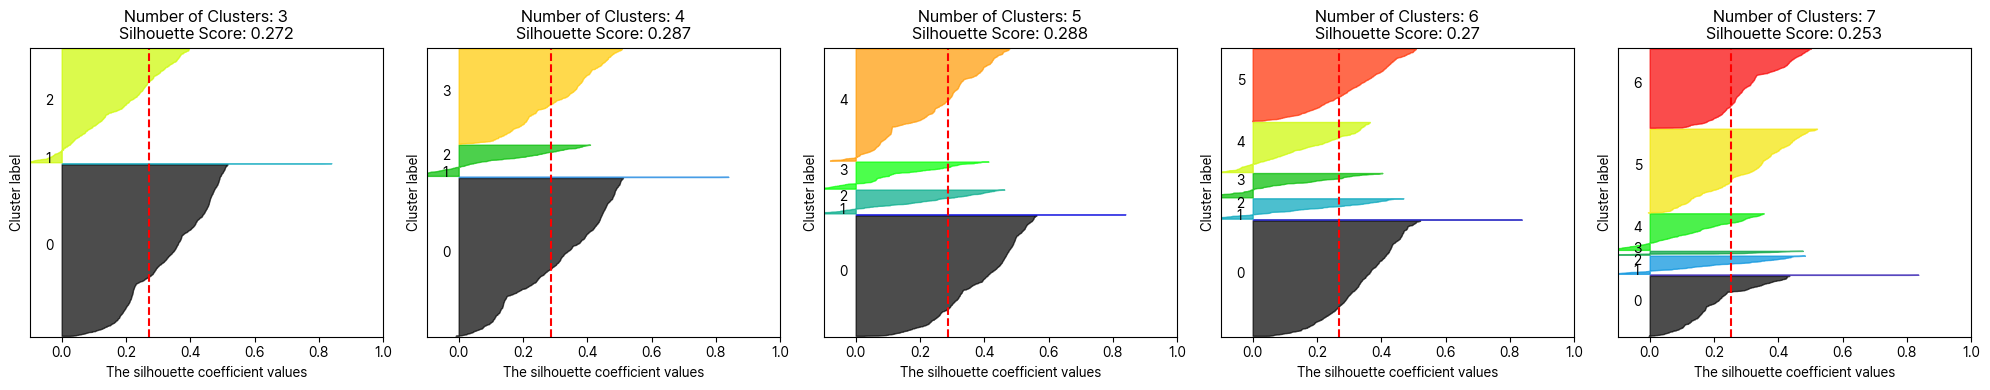

In [190]:
visualize_silhouette([3,4,5,6,7], X_features_scaled)

C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\38920

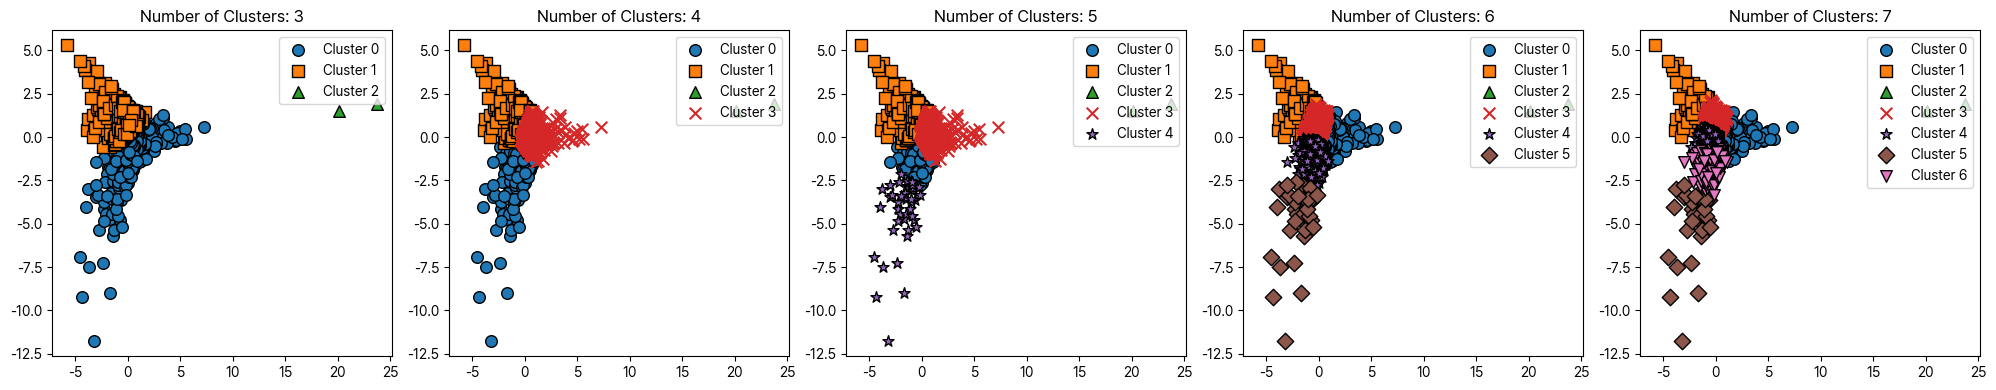

In [191]:
visualize_kmeans_plot_multi([3,4,5,6,7], X_features_scaled)

### 로그 스케일
가격과 총 리뷰 수에 로그스케일을 적용한다.

In [192]:
### Log 변환을 통해 데이터 변환

# Price, Review Count 컬럼에 np.log1p() 로 Log Transformation
df_kmean['가격_log'] = np.log1p(df_kmean['가격'])
df_kmean['총 리뷰 수_log'] = np.log1p(df_kmean['총 리뷰 수'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = df_kmean[['가격_log','총평점','총 리뷰 수_log','카테고리']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# Kmean알고리즘 설정 및 예측
kmean = KMeans(n_clusters=5, random_state=0)
labels = kmean.fit_predict(X_features_scaled)

# 결과 label추가
df_kmean['cluster'] = labels

# 실루엣스코어 계산
silhouette_score(X_features_scaled, labels)

np.float64(0.2663875212657356)

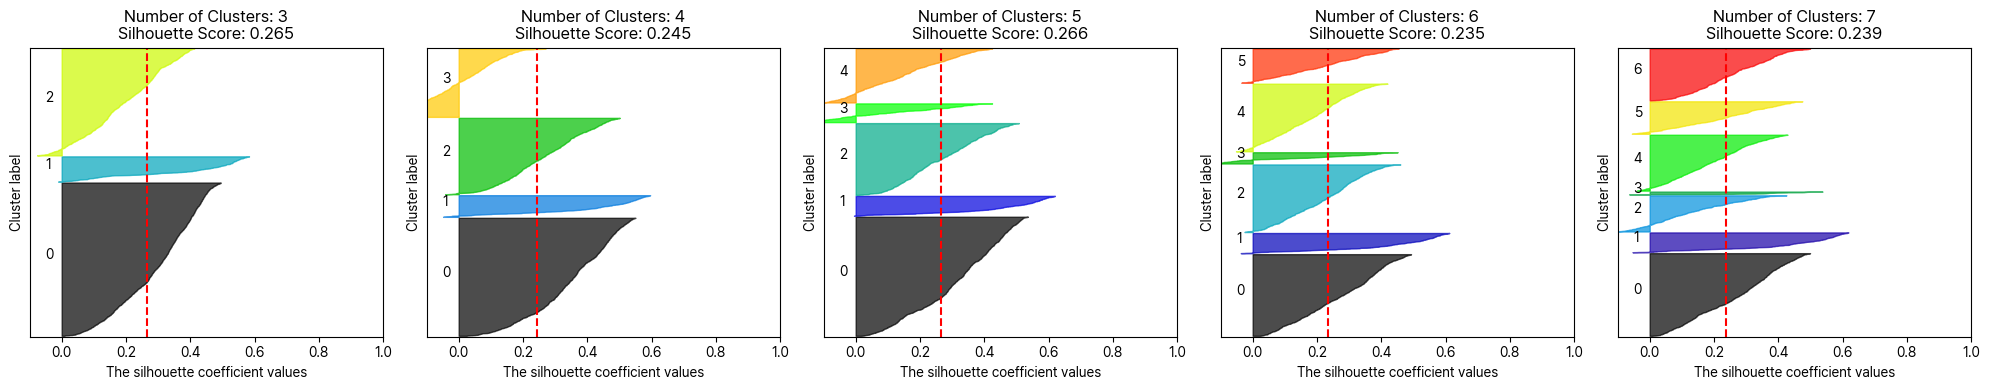

C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\38920

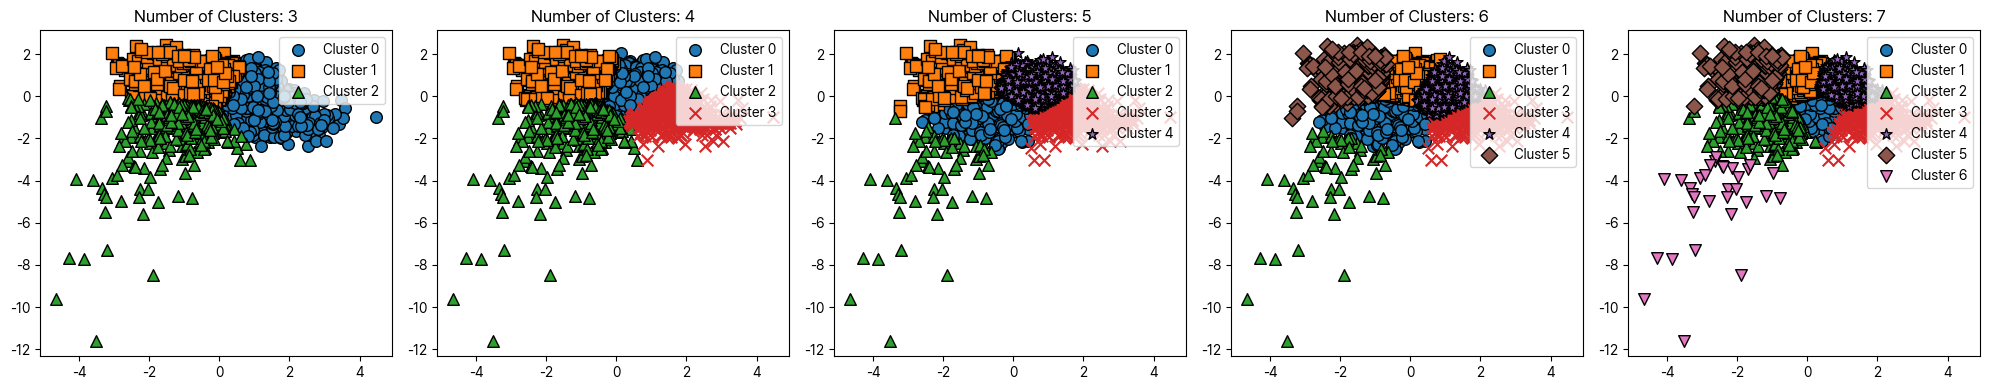

In [193]:
visualize_silhouette([3,4,5,6,7], X_features_scaled)
visualize_kmeans_plot_multi([3,4,5,6,7], X_features_scaled)

In [194]:
df_kmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   카테고리        3168 non-null   int64  
 1   브랜드         3168 non-null   object 
 2   제품명         3168 non-null   object 
 3   가격          3168 non-null   int64  
 4   총평점         3168 non-null   float64
 5   총 리뷰 수      3168 non-null   int64  
 6   가격_log      3168 non-null   float64
 7   총 리뷰 수_log  3168 non-null   float64
 8   cluster     3168 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 210.5+ KB


In [195]:
code_table

,label,code
0,남성메이크업,0
1,로션,1
2,미스트&오일,2
3,선크림,3
4,스킨토너,4
5,시트팩,5
6,에센스&세럼&앰플,6
7,크림,7
8,클렌징,8
9,패드,9


In [198]:
df_kmean

,카테고리,브랜드,제품명,가격,총평점,총 리뷰 수,가격_log,총 리뷰 수_log,cluster
0,1,에스트라,에스트라 아토베리어365 로션 150ml 리필 기획,38000,4.9,2494,10.545368,7.822044,2
1,1,포엘리에,포엘리에 옴므 5 IN 1 미백 주름 기능성 올인원 남자 로션 150ml,15500,4.9,154,9.648660,5.043425,2
2,1,온그리디언츠,온그리디언츠 스킨 베리어 카밍 로션 기획,30510,4.9,3100,10.325843,8.039480,2
3,1,아이디얼포맨,아이디얼포맨 퍼펙트 올인원 토트넘 홋스퍼 에디션,28310,4.9,3810,10.251006,8.245647,2
4,1,아이디얼포맨,아이디얼포맨 올인원 토트넘 홋스퍼 에디션 2종,28310,4.9,4408,10.251006,8.391403,2
...,...,...,...,...,...,...,...,...,...
3163,9,헤이네이처,헤이네이처 어성초 카밍 토너 패드 65매,30000,4.9,78,10.308986,4.369448,4
3164,9,멘톨로지,멘톨로지 슈퍼쿨 카밍패드 70매,22000,4.7,7,9.998843,2.079442,4
3165,9,메디앤서,메디앤서 비타 콜라겐 글로우 패드 기획 80매 기획,26000,4.7,265,10.165890,5.583496,0
3166,9,아비브,아비브 부활초 콜라겐 패드 퍼밍 터치 60매 기획,24000,4.6,427,10.085851,6.059123,0


In [199]:
cluster_1 = df_kmean[df_kmean['cluster']== 1]

카테고리 확인결과, cluster1군만 202개의 '시트팩', 13개의 '클렌징'으로 두드러지게 차이가 나 cluster1만 분석진행

In [200]:
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

# Pretendard-Regular 폰트 경로
font_path = r"C:\Users\박명화\Downloads\Pretendard-1.3.9\public\static\alternative\Pretendard-Regular.ttf"

# 폰트 로드
pretendard_font = fm.FontProperties(fname=font_path)

# matplotlib에 폰트 적용
plt.rcParams['font.family'] = pretendard_font.get_name()

# 유니코드 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.ticker as mtick

- cluster의 90%는 시트팩 제품으로 시트팩의 EDA분석에서는 가격이 높을수록 리뷰수가 감소하여 소비자들이 가격에 민감하게 반응하는 제품으로 확인됨. 

### 5.2  Cluster1 분석

정제

In [202]:
cluster_1['카테고리'].value_counts()

카테고리
5    202
8     13
6      3
9      2
3      1
1      1
2      1
Name: count, dtype: int64

In [151]:
cluster_1

,카테고리,가격,총평점,총 리뷰 수,cluster,카테고리명
231,1,990,4.6,71,1,로션
381,2,5600,4.7,487,1,미스트&오일
798,3,990,4.8,8,1,선크림
1142,5,1000,4.9,224262,1,시트팩
1158,5,2000,5.0,237,1,시트팩
...,...,...,...,...,...,...
2889,8,2000,4.7,3271,1,클렌징
2919,8,5900,4.6,852,1,클렌징
2938,8,5100,4.7,3901,1,클렌징
3038,9,3900,4.6,2129,1,패드


In [152]:
cluster_1["제품명"] = 제품.loc[cluster_1.index, "제품명"]
cluster_1

C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3191772814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1["제품명"] = 제품.loc[cluster_1.index, "제품명"]


,카테고리,가격,총평점,총 리뷰 수,cluster,카테고리명,제품명
231,1,990,4.6,71,1,로션,엠도씨 안티 링클 스킨 플러스 로션 150ml 기획
381,2,5600,4.7,487,1,미스트&오일,에비앙 브뤼미자뙤르 페이셜미스트 50ml
798,3,990,4.8,8,1,선크림,엠도씨 선 스킨 플러스 크림 100ml 기획
1142,5,1000,4.9,224262,1,시트팩,메디힐 에센셜 마스크팩 1매 고기능 7종 택1
1158,5,2000,5.0,237,1,시트팩,바이오힐보 세라뮨 하이드레이팅 크림 마스크 1매
...,...,...,...,...,...,...,...
2889,8,2000,4.7,3271,1,클렌징,케어존 약산성폼 30ml
2919,8,5900,4.6,852,1,클렌징,식물나라 쌀겨수 매끈 스크럽 폼 120g
2938,8,5100,4.7,3901,1,클렌징,라운드어라운드 컴포트 그린티 뽀득폼 200ML 기획
3038,9,3900,4.6,2129,1,패드,아리얼 스트레스 릴리빙 데일리 픽 패드 2종 중 택1


In [153]:
cluster_1=cluster_1[['cluster','카테고리','카테고리명','제품명','가격','총평점','총 리뷰 수']]

#### 5.2.1 Cluster1 분포

In [154]:
cluster_1.describe()

,cluster,카테고리,가격,총평점,총 리뷰 수
count,223.0,223.000000,223.000000,223.000000,223.000000
mean,1.0,5.183857,3228.699552,4.773543,6919.529148
std,0.0,0.883946,1792.152969,0.092850,24828.183295
min,1.0,1.000000,750.000000,4.400000,8.000000
25%,1.0,5.000000,1600.000000,4.700000,332.500000
50%,1.0,5.000000,3000.000000,4.800000,1294.000000
75%,1.0,5.000000,4025.000000,4.800000,5099.500000
max,1.0,9.000000,8000.000000,5.000000,266778.000000


cluster 1
- 가격은 평균이 약 3228원, 편차는 1792. 중앙값은 3000원임. 차이가 큼. 즉, 가격의 분포가 불균형
- 총 평균의 경우 평균 4.77, 편차는 0.092으로 밀집되어있음. 근데 최소값이 4.4, 최대값이 5으로 평점이 너무 높음.
- 총 리뷰 수는 평균 6919, 편차는 24828으로 차이가 극단적으로 큼. 즉, 리뷰 수의 분포가 불균형

C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3071625701.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1["카테고리명"] = cluster_1["카테고리"].map(category_mapping)
C:\Users\박명화\AppData\Local\Temp\ipykernel_7444\3071625701.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=category_counts.index, x=category_counts.values, palette=colors)


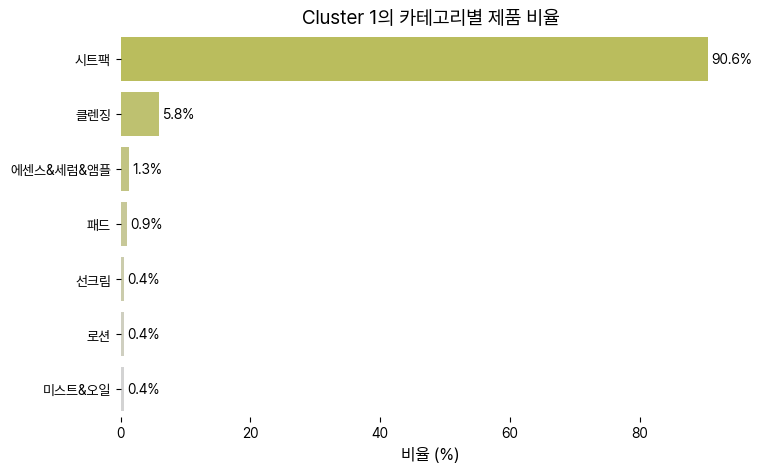

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 인코딩된 카테고리 코드 → 실제 카테고리명으로 변환
category_mapping = {
    0: "남성메이크업",
    1: "로션",
    2: "미스트&오일",
    3: "선크림",
    4: "스킨토너",
    5: "시트팩",
    6: "에센스&세럼&앰플",
    7: "크림",
    8: "클렌징",
    9: "패드"
}

# 📌 카테고리 이름으로 변환
cluster_1["카테고리명"] = cluster_1["카테고리"].map(category_mapping)
category_counts = cluster_1["카테고리명"].value_counts(normalize=True) * 100  # 비율 변환

# 📌 "#C9CD4D" → "#D3D3D3" 그라데이션 색상 적용
num_categories = len(category_counts)
colors = sns.color_palette("blend:#C9CD4D,#D3D3D3", num_categories)

# 📌 수평 막대 그래프 생성 (테두리 제거)
plt.figure(figsize=(8, 5))
ax = sns.barplot(y=category_counts.index, x=category_counts.values, palette=colors)

# 📌 x, y 라벨 및 제목 설정
plt.xlabel("비율 (%)", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Cluster 1의 카테고리별 제품 비율", fontsize=14)
plt.xlim(0, max(category_counts.values) + 5)  # 그래프 우측 여백 추가

# 📌 막대 위에 숫자(비율) 표시 (테두리 없이)
for index, value in enumerate(category_counts):
    ax.text(value + 0.5, index, f"{value:.1f}%", ha='left', va='center', fontsize=10)

# 📌 테두리 제거
sns.despine(left=True, bottom=True)

# 📌 그래프 출력
plt.show()


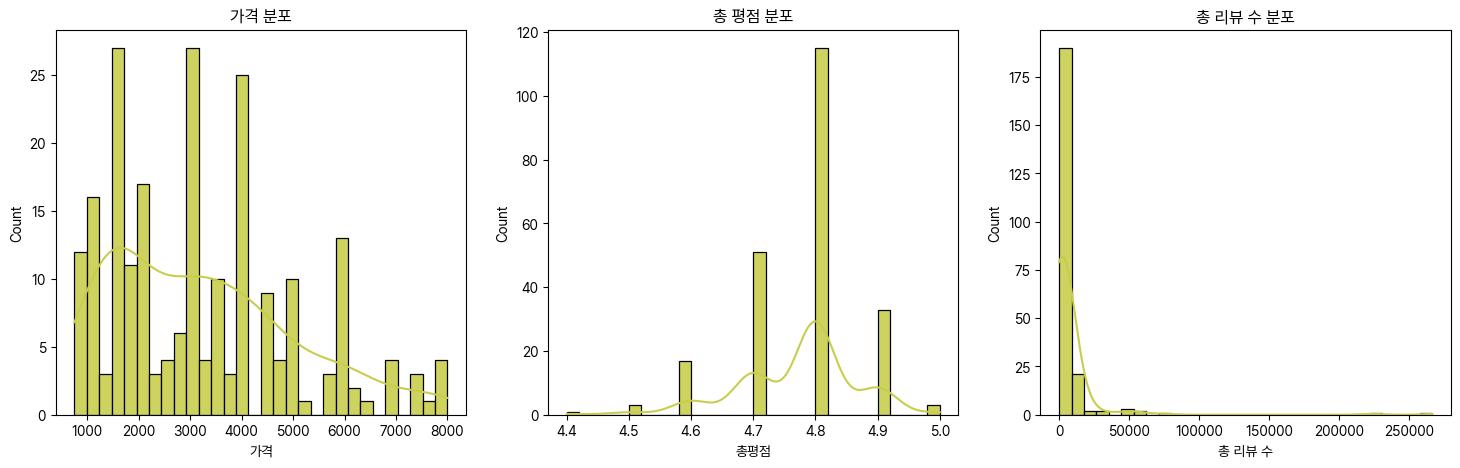

In [157]:
# 히스토그램: 가격, 총 평점, 총 리뷰 수 분포
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(cluster_1["가격"], bins=30,color="#C9CD4D", kde=True, ax=axes[0], alpha=0.9)
axes[0].set_title("가격 분포")

sns.histplot(cluster_1["총평점"], bins=30,color="#C9CD4D", kde=True, ax=axes[1], alpha=0.9)
axes[1].set_title("총 평점 분포")

sns.histplot(cluster_1["총 리뷰 수"], bins=30, color="#C9CD4D",kde=True, ax=axes[2], alpha=0.9)
axes[2].set_title("총 리뷰 수 분포")

plt.show()

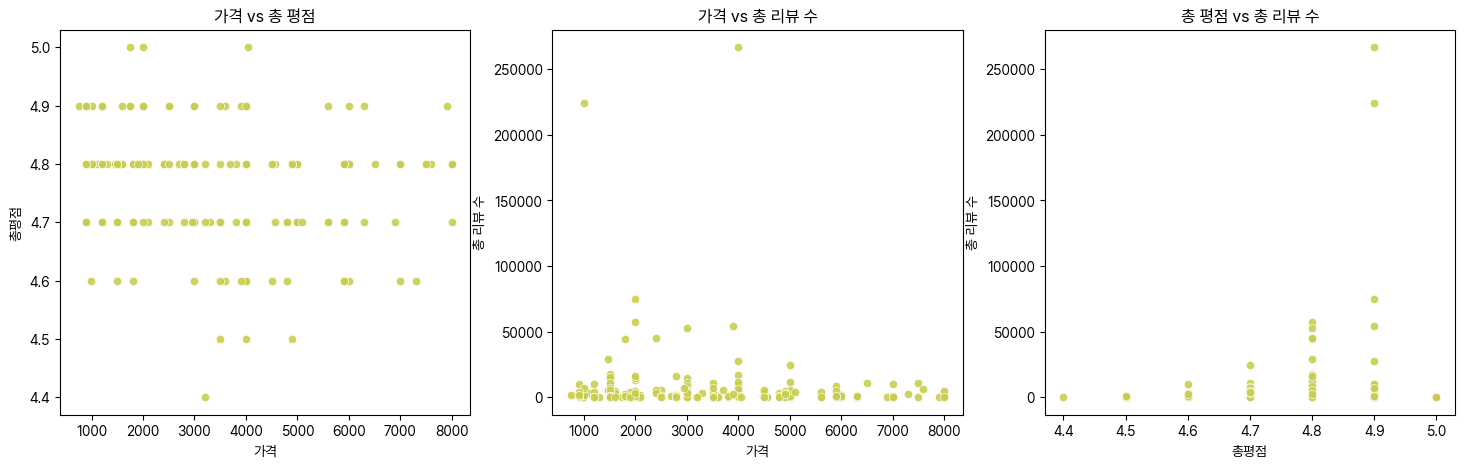

In [158]:
# 산점도: 가격과 총 평점, 가격과 총 리뷰 수, 총 평점과 총 리뷰 수
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=cluster_1["가격"], y=cluster_1["총평점"], color="#C9CD4D",alpha=0.9, ax=axes[0])
axes[0].set_title("가격 vs 총 평점")

sns.scatterplot(x=cluster_1["가격"], y=cluster_1["총 리뷰 수"], color="#C9CD4D", alpha=0.9, ax=axes[1])
axes[1].set_title("가격 vs 총 리뷰 수")

sns.scatterplot(x=cluster_1["총평점"], y=cluster_1["총 리뷰 수"], color="#C9CD4D", alpha=0.9, ax=axes[2])
axes[2].set_title("총 평점 vs 총 리뷰 수")

plt.show()

약한 선형적인 관계를 보이는 총 평점과 총 리뷰 수 이지만 총평점의 경우 최솟값이 4.4, 최대값이 5.0로 너무 밀집되어 있어 총평점이 높을수록 리뷰수가 많아진다고 판단하기 어려움.

#### 5.2.2 제품별 가격과 리뷰 수 관계 분석

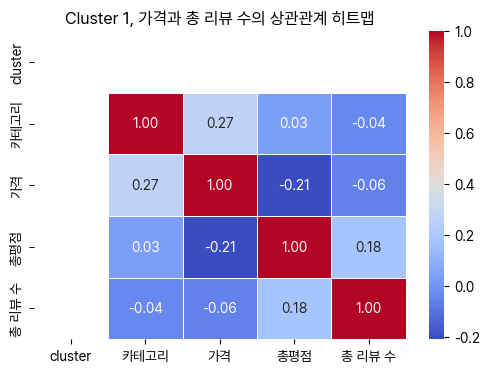

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 데이터만 선택 (가격과 총 리뷰 수)
df_numeric = cluster_1.select_dtypes(include=['number'])  # 숫자형 데이터만 선택

# 상관계수 계산
corr_matrix = df_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cluster 1, 가격과 총 리뷰 수의 상관관계 히트맵")
plt.show()


해석<br>
Cluster1: 가격, 평점, 리뷰 수 등과 강한 연관이 없다는 뜻.
- 가격과 평점 사이에 약한 음의 상관관계(-0.21)
- 총 리뷰수와 총평점의 관계 약한 양의 상관관계(0.18)
- 카테고리와 가격의 약한 양의 상관관계(-0.04)<br>
-> 평점의 경우, 최솟값이 4.4, 최대값이 5.0으로 유의미한 점수라고 보기 어렵다. <br>
     카테고리의 숫자는 인코딩된 번호이기에 가격의 관계를 분석할 필요가 없음.

- 이 클러스터 (군집화)로 확인해야될 분석
1. Cluster 1 내에서 가격과 리뷰 수의 분포가 어떻게 형성되는지 확인-> 차이를 비교하여 세부적인 패턴을 찾기
2. Cluster 1 내 제품별 가격과 리뷰 수 관계 분석 -> 리뷰 수가 높은 제품과 낮은 제품의 가격 차이가 있는지 확인, 가격이 높은 제품이 반드시 리뷰 수도 높은지 소비자 반응과의 관계 분석
3. Cluster 1 내 시트팩 & 클렌징의 브랜드 분석 -> 특정 브랜드가 이 클러스터에서 우세한지 확인->Cluster 1 내 브랜드별 점유율 (파이 차트, 바 차트), 브랜드별 평균 가격 & 리뷰 수 비교

---

## 3. 감성 분석 및 브랜드 마케팅

**감성분석 경위**
- **평점만으로 제대로 된 고객반응 분석이 어렵다** : 평점 최고점(5) 리뷰 표본을 직접 조사 한 결과, 일부 리뷰는 중립, 또는 부정적인 의견, 단어나 뉘앙스를 보임에도 불구하고 평점은 5점으로 기록 되었다. 따라서 오직 평점만으로 사용자의 반응분석을 진행 할 경우 신뢰성 있는 분석이라고 보기 어렵다고 판단된다. 따라서 평점과 관계없이 잘 학습된 자연어 모델로 리뷰에 대한 점수를 다시 측정하여 이를 기준으로 *사용자 감성*을 분석 및 *추천 시스템*을 개발한다. 

- *평점은 5점이나 긍정의 반응이라고 판단되는 리뷰의 예*: ['??리뉴얼 전으로 돌아갔으면 좋겠어요..리뉴얼 후에도 여전히 좋긴 하지만, 이전 제품이 워낙 좋았다보니 아무래도 비교가 되는것 같아요ㅠㅠ리뉴얼 전 후를 간단하게 비교하자면, 리뉴얼 전에 비해<겉도는 양은 많아지고 수분감은 줄어들었어요..(중략)..아쉽습니다ㅜㅜ']

**학습용 데이터**  
- 네이버쇼핑몰 리뷰 텍스트 (Review Text) 20만건

**레이블**  
- 감성 분류 (긍정(1), 부정(0))  

**모델**  
- GRU (tensorflow)

**예측 데이터**
- 올리브영 제품리뷰 225269건




**활용 목표**  
- 특정 브랜드와 경쟁사의 감성 차이 분석  
- 브랜드 인지도 및 평판 개선을 위한 전략 수립  
- Wordcloud 등 시각화를 통한 마케팅 인사이트 도출

## GLU딥러닝 모델 학습과정 -> 수업내용중 인공지능 18번 코랩 내용중 네이버 리뷰 데이터로 딥러닝 모델 학습하는 과정을 정리하고 축약해서 이 파트에 넣어주세요. 

### 예측용 데이터 로드

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

df = pd.read_csv('리뷰_정제완료_250212.csv.')
df.head(20)

,카테고리,제품명,유저ID,평점,날짜,키워드,리뷰
0,로션,에스트라 아토베리어365 로션 150ml 리필 기획,망구네,5,2025.01.25,민감성 웜톤 트러블,굿굿 대용량이 나와서 좋아요 촉촉하고 오래전부터 쓰던 제품입니다
1,로션,에스트라 아토베리어365 로션 150ml 리필 기획,맹고멍멍,5,2025.02.05,복합성 쿨톤 모공 탄력,대용량 너무 좋아요!!듬뿍듬뿍 바르는 중입니다 최공~!
2,로션,에스트라 아토베리어365 로션 150ml 리필 기획,포즈커,5,2025.02.04,건성 겨울쿨톤 다크서클 민감성,"??리뉴얼 전으로 돌아갔으면 좋겠어요..리뉴얼 후에도 여전히 좋긴 하지만, 이전 제..."
3,로션,에스트라 아토베리어365 로션 150ml 리필 기획,녹차라떼덕후,5,2025.02.04,복합성 쿨톤 모공 탄력,"정말 너무 순하고 자극이 하나도 없어요, 에스트라가 왜 소문났는지 알 것 같아요"
4,로션,에스트라 아토베리어365 로션 150ml 리필 기획,맹고멍멍,5,2025.01.16,건성 모공 미백,"에스트라 없이 못 살아요ㅠㅠㅠ진짜 돌고돌아 에스트라 쓰게 됩니다,,ㅠㅠ"
5,로션,에스트라 아토베리어365 로션 150ml 리필 기획,꿈꾸는냥이,5,2025.01.31,지성 가을웜톤 다크서클 모공,로션 안쓰고 에센스를 여러가지 쓰는 타입이였는데 겨울되니 로션을 안쓸수가 없어 구매...
6,로션,에스트라 아토베리어365 로션 150ml 리필 기획,shanying,5,2025.01.19,복합성 봄웜톤 다크서클 모공,매번 구매하고 있는 제품입니다!! ㅎㅎ다른 분들에게도 강력 추천드리고 싶습니다!!
7,로션,에스트라 아토베리어365 로션 150ml 리필 기획,애뎡,5,2025.01.26,건성 다크서클 모공,너무 좋아요ㅜ 건조하고 피부 망가져서 속상했는데 쓰고 난 후로 건조함도 없어지고 아...
8,로션,에스트라 아토베리어365 로션 150ml 리필 기획,cenoifroubr,5,2024.12.30,민감성 가을웜톤 민감성 잡티,피부 뒤집어질 때마다 찾는 로션입니당확실하게 피부컨디션이 안 좋을 때 꼼꼼하게 발라...
9,로션,에스트라 아토베리어365 로션 150ml 리필 기획,감자슬,5,2025.01.27,NaN,믿고 쓰는 에스트라! 피부가 예민한 편이라 로션도 순한 걸로 찾고 있었는데 에스타라...


In [5]:
df[df['리뷰'] == ' ']

,카테고리,제품명,유저ID,평점,날짜,키워드,리뷰


### 딥러닝 모델 로드

In [10]:
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt
import pickle

max_len = 80
okt = Okt()
model_path = 'shopreviewnaver.keras'
tokenizer_path = 'shopreviewnaver.pkl'

loaded_model = tf.keras.models.load_model(model_path)

with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

감성분석용 함수 sentiment_predict_new
- score는 '긍정' 리뷰가 될 확률을 의미합니다.
- 매개변수는 '리뷰' 글 입니다. 

In [17]:
def sentiment_predict(new_sentence):
    print(new_sentence)
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)

    score = float(loaded_model.predict(pad_new))
    print(score)
    return score


### 긍정인 리뷰 샘플 감성분석 테스트

In [ ]:
for i in df['리뷰'][10:15]:
    sentiment_predict(i)

크림보다는 보습력은 떨어지지만 너무 라이트하지 않게 보습 충전해주는 것 같아요 순해서 사계절 내내 잘 사용하고 있습니다
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
0.9946209788322449
건성분들한테 진짜 강력추천이요 순하고 촉촉하고 흡수도 빨라서 온 가족들이 다같이 사용합니다
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0.9984909296035767
좋아요 쟁임템이구 용량도 많은데 앵간한크림보다 보습력이 좋아용
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_15656\2693802459.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))


0.9785622358322144
피부과에서 받은뒤러 이 브랜드 로션만 10년째 쓰고 있어요 진짜 너무 좋습니다
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0.9901058673858643
수부지 기준 에스트라 크림은 부분적으로만 바르기에 좋은데 그냥 수딩크림들은 겨울에 건조해서 에스트라 로션으로 올겨울 정착! 너무 부담없고 무겁지 않아서 트러블 유발 안 하는데 속건조 싹 잡아줘요
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0.996643602848053


### 부정인 리뷰 샘플 감성분석 테스트

In [ ]:
test_df = df[df['평점'] == 2]
for i in test_df['리뷰'][10:15]:
    sentiment_predict(i)

민감성도 잘 사용할줄알았는데 따끔거림 이거보다 파랑색이 훨씬 괜찮았음..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
0.07744581252336502
예전에 피부과 진료 받고 피지오겔 제품을 썼었는데 되게 긍정적으로 생각한 제품입니다. 근데 여드름성 피부이고 제가 시어버터랑 잘 안 맞는데 친구가 이 제품은 시어버터가 안 들어간 제품이라 의심없이 샀어요. 손등에 테스트 해볼 때 약간 아리까리 하긴 했는데 일단 집에와서 발라봤어요. 발림성도 괜찮고 진정에 좋다고 해서 일단 바르고 잤는데 다음날 회사에서 히터도 안틀었는데 건조해 죽는줄 알았어요. 빨리 점심시간이 오길 바라며 바로 올영으로 달려가 기존에 바르던 테스터용 크림 덧발라줬네요.. 오죽하면 그랬을까요.. 제가 속건조가 있긴한데 기존 크림 쓸 땐 이렇진 않았거든요.. 제 피부에 안 맞는 거 같아요.. 두세번 쓰고 안 쓰고 놔두는데 아깝네요.. 근데 사은품으로 주는 이 팩은 좋은 거 같아요. 저는 개인적으로 크림 마스크팩이 잘 맞는 것 같아요.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.44843319058418274
다좋은데 불량품을 보내주셨네요 펌프가 배송중에 어디 부딪힌건지 박혀서  빠지지가 않아요 이미 뜯어버려서 그냥 씁니다
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.0013192729093134403
제 피부에는 안 맞네요. 이것만 쓰면 얼굴이 빨갛게 뒤집어져요ㅠㅠㅠ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

C:\Users\pieta\AppData\Local\Temp\ipykernel_9248\325134331.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.003132520942017436
피부애 닿는 자극은 없는데 좀 사용하면 트러블 올라오는 거 같아요 촉촉한 로션
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0.22877483069896698


### 올리브영 리뷰 데이터 예측하기
- entiment_predict_new 함수는 감성예측의 결과를 1부터 5점까지 분류하는 함수입니다. 

In [4]:
b = pd.read_csv('리뷰_정제완료_250212.csv')
b['평점'].value_counts()

평점
5    189043
4     26149
3      7381
2      1356
1      1340
Name: count, dtype: int64

In [22]:
def sentiment_predict_new(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)
    score = float(loaded_model.predict(pad_new))

    if score >= 0.95:
        return 5 # 긍정이 될 확률이 90%이상인 리뷰만 평점 5점을 부여합니다. 
    elif score >= 0.80:
        return 4 
    elif score >= 0.65:
        return 3
    elif score >= 0.5:
        return 2
    else:
        return 1 

### 22만개 리뷰 감성점수 예측
- 데이터의 갯수가 많기 때문에 작업을 병렬처리 합니다.
- 매 1000개 작업 마다 파일을 백업합니다. 

In [ ]:
from joblib import Parallel, delayed
from tqdm import tqdm
import os

output_file = "PART2.csv"

if os.path.exists(output_file):
    df_existing = pd.read_csv(output_file)
    processed_count = len(df_existing.dropna(subset=["감성평점"]))  #
    print(f"기존 파일 발견! {processed_count}개 데이터가 처리됨. 이어서 진행합니다.")

    # 기존 데이터 반영 (중복 실행 방지)
    df.loc[:processed_count-1, "감성평점"] = df_existing["감성평점"].values
else:
    processed_count = 0
    df["감성평점"] = None  # 감성평점 컬럼 추가
    df.to_csv(output_file, index=False)  # ✅ 새로운 파일 생성
    print("기존 파일 없음 → 새 파일 생성 완료!")

def safe_sentiment_predict(text):
    try:
        return sentiment_predict_new(text)
    except Exception as e:
        print(f" Error processing: {text} | Error: {e}")
        return "error"

# 1000개씩 병렬 처리 & 저장
chunk_size = 1000  # 1000개씩 처리
num_workers = 4  # CPU 4코어 사용

for i in tqdm(range(processed_count, len(df), chunk_size), desc="Processing"):
    df_chunk = df.iloc[i:i + chunk_size].copy()

    # 병렬 실행
    df_chunk["감성평점"] = Parallel(n_jobs=num_workers, backend="threading", batch_size=500)(
        delayed(safe_sentiment_predict)(text) for text in df_chunk["리뷰"]
    )

    df.iloc[i:i + chunk_size] = df_chunk

    df.to_csv(output_file, index=False)
    print(f" {i + chunk_size}개까지 저장 완료.")



In [2]:
c = pd.read_csv('PART2.csv')
c['감성평점'].value_counts()

감성평점
5    180160
1     21015
4     16042
3      4846
2      3206
Name: count, dtype: int64

### 기존 사용자들이 매긴 실제 평점과 감성평점 비교

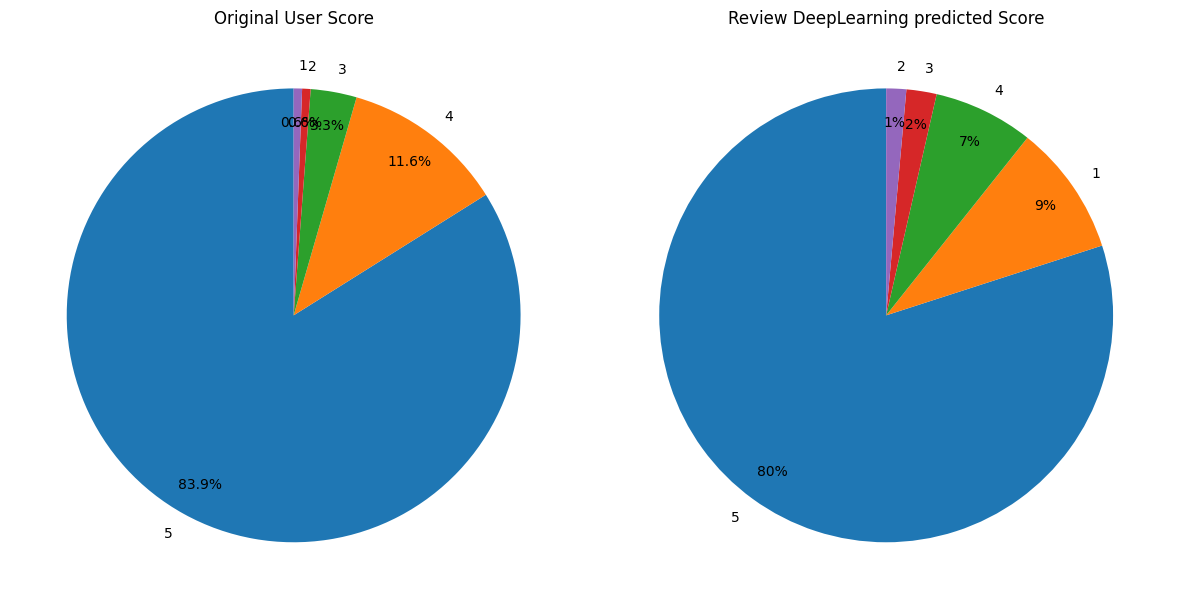

In [11]:

# 평점 및 감성평점 데이터 개수 확인
rating_counts = b['평점'].value_counts()
sentiment_counts = c['감성평점'].value_counts()

# 파이 차트 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 파이 차트 (평점)
axes[0].pie(rating_counts, labels=rating_counts.index, autopct='%1.01f%%',pctdistance=0.85, startangle=90)
axes[0].set_title('Original User Score')

# 두 번째 파이 차트 (감성평점)
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.0f%%',pctdistance=0.85, startangle=90)
axes[1].set_title('Review DeepLearning predicted Score')

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()


- 사용자가 직접 제출한 평점과 (1-5) GLU모델이 리뷰를 기반으로 예측한 감성점수는 대체적으로 약간의 차이가 존재합니다. 
- 원본과 예측 데이터 모두 5점의 비중이 약 80% 정도로 확인 되었고 나머지 점수 (1-4)들이 약20% 를 차지하고 있습니다. 
- 실제 사용자 평점과 리뷰감성이 일치하는 수준이라고 볼 수 있겠다. 
- 문맥, 어조, 뉘앙스를 분석한 딥러닝모델의 예측 결과가 더 신빙성있다고 판단됩니다. 
- 감성평점을 활용하여 추천시스템을 설정합니다. 

## 2. 협업 필터링 (사용자 맞춤 추천 시스템)
** Feature (입력 변수)**  
- 사용자 ID  
- 제품 ID  
- 평점 (Rating)  

** 모델**  
- Surprise 라이브러리의 **SVD**  
- KNN-based **Collaborative Filtering**  

** 활용 목표**  
- 특정 사용자에게 적절한 제품을 추천하는 시스템 구축  
- 사용자 맞춤형 마케팅 적용  

- 데이터 로드 및 확인

In [189]:

df = pd.read_csv('PART2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225269 entries, 0 to 225268
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   카테고리    225269 non-null  object
 1   제품명     225269 non-null  object
 2   유저ID    225269 non-null  object
 3   평점      225269 non-null  int64 
 4   날짜      225269 non-null  object
 5   키워드     124947 non-null  object
 6   리뷰      225269 non-null  object
 7   감성평점    225269 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 13.7+ MB


- 협업필터링에 필요한 열만 남기기

In [190]:
df=df[['유저ID','제품명','감성평점']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225269 entries, 0 to 225268
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   유저ID    225269 non-null  object
 1   제품명     225269 non-null  object
 2   감성평점    225269 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.2+ MB


- 유저 아이디 정제: 특수기호 '*' 제거 
- 실제 유저 아이디를 확인 할 수 없기 때문에 문자가 암호화된 특수기호 '*' 는 제거합니다.
- 올리브영의 일반 유저 ID에는 특수기호가 존재할 수 없습니다. 

In [191]:
def user_id(data):
  if data[-4:] == "****":
    return data[:-4]
  else:
    return data
df['유저ID'] = df['유저ID'].apply(user_id)

### 감성평점의 평점비

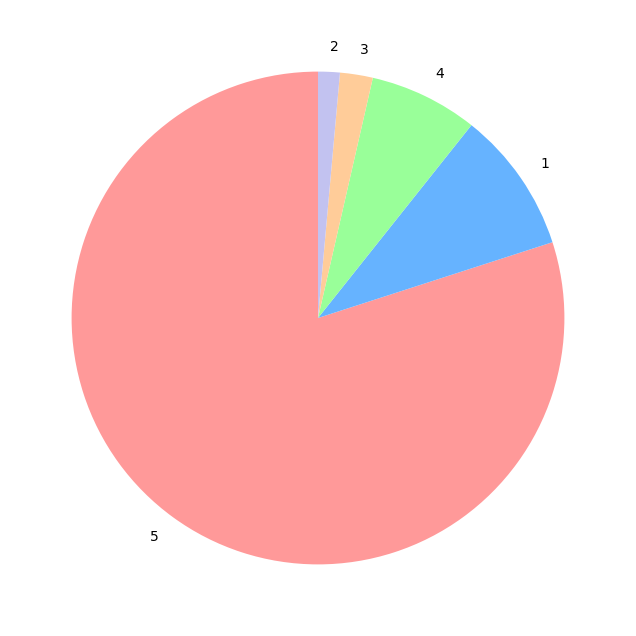

In [192]:
import matplotlib.pyplot as plt

rating_counts = df['감성평점'].value_counts()

plt.figure(figsize=(8, 8)) 
plt.pie(rating_counts, labels=rating_counts.index, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], startangle=90)

plt.show()

### 유저ID, 제품명 인코딩

In [193]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['유저ID'] = label_encoder.fit_transform(df['유저ID'])

label_encoder_product = LabelEncoder()
df['제품명'] = label_encoder_product.fit_transform(df['제품명'])

In [194]:
# 각 유저 ID 레이블의 코드 정보
code_table_user = pd.DataFrame({'label': label_encoder.classes_,
                           'code': range(len(label_encoder.classes_))})
code_table_user

,label,code
0,0,0
1,0.00E+00,1
2,00,2
3,000,3
4,00000000,4
...,...,...
65913,힝꾸꾸,65913
65914,힝소,65914
65915,힝아미,65915
65916,힝이2,65916


In [195]:
# 각 제품 레이블의 코드 정보
code_table_product = pd.DataFrame({'label': label_encoder_product.classes_,
                           'code': range(len(label_encoder_product.classes_))})
code_table_product

,label,code
0,AGE20S 화잘먹 스킨핏 수분볼륨 선크림 플러스 50ml*2,0
1,AHC 누드 톤업 크림 내추럴 글로우 40ml SPF50+ PA++++,1
2,AHC 마스터즈 멜라프로텍트 워터풀 선크림 40ml,2
3,AHC 마스터즈 아쿠아 리치 선크림 1+1 기획,3
4,AHC 마이크로 레드 착붙 콜라겐 마스크 시트 1매,4
...,...,...
3081,휩드 비건 팩클렌저 튜브형 130g,3081
3082,휩드 유자몽 비건 팩클렌저 80g 기획,3082
3083,휴캄 수분결 토너 패드 90매,3083
3084,휴캄 킨츠키 탄력 크림 70g,3084


### 데이터 구성
- '유저ID' (65918)
- '제품명' (3086)
- '평점' (1,2,3,4,5)

#### 감성평점 정규화
- 5점의 비율이 너무 높으므로 대부분의 예측값이 5점으로 몰려 추천 시스템이 차이를 구분하지 못할 수 있다. 
- 모델이 1~5점 전체 범위를 더 균일하게 인식하도록 정규화 진행.

In [196]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 감성평점 정규화 적용 (0~1 범위로 변환)
df['감성평점_정규화'] = scaler.fit_transform(df[['감성평점']])

In [197]:
df

,유저ID,제품명,감성평점,감성평점_정규화
0,42400,2163,5,1.00
1,42539,2163,5,1.00
2,62695,2163,4,0.75
3,37497,2163,1,0.00
4,42539,2163,1,0.00
...,...,...,...,...
225264,5360,136,5,1.00
225265,46284,136,5,1.00
225266,13787,136,5,1.00
225267,14974,136,2,0.25


In [199]:
from surprise import Dataset
# 평점 범위 지정
reader = Reader(rating_scale=(0, 1))

# DataFrame을 Surprise Dataset으로 변환
data = Dataset.load_from_df(df[['유저ID', '제품명', '감성평점_정규화']], reader)

#### 데이터 나누기
- 이제, 모델훈련 후 추천시스템 구성

In [200]:
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

### 알고리즘 선택과 학습
- test() 모든 검증 데이터에 대한 평점 예측
- predict() 하나의 사용자와 아이템에 대한 예측

In [201]:
# 알고리즘 선택 및 학습 (SVD 사용)
algo = SVD()
algo.fit(trainset)

# 테스트셋에 대한 예측 및 성능 평가
pred = algo.test(testset) # 예측
rmse = accuracy.rmse(pred) # 평가

RMSE: 0.3008


- 학습된 SVD모델은 평점예측의 편차 평균이 약 0.30로 준수한 성적을 보임

In [202]:
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2997  0.2997  0.3041  0.2977  0.3015  0.3005  0.0021  
MAE (testset)     0.1981  0.1978  0.2002  0.1967  0.1985  0.1983  0.0011  
Fit time          2.18    2.04    2.14    2.13    2.18    2.13    0.05    
Test time         0.40    0.18    0.39    0.19    0.22    0.27    0.10    


{'test_rmse': array([0.29969364, 0.29972431, 0.30408163, 0.29772704, 0.30150534]),
 'test_mae': array([0.19808734, 0.19779244, 0.20021308, 0.19669713, 0.1984871 ]),
 'fit_time': (2.180140972137451,
  2.0355818271636963,
  2.1382808685302734,
  2.1312999725341797,
  2.1821632385253906),
 'test_time': (0.40192365646362305,
  0.17552685737609863,
  0.38596558570861816,
  0.18649983406066895,
  0.21841645240783691)}

### Baseline알고리즘 테스트

In [67]:
from surprise import BaselineOnly
# BaselineOnly 알고리즘 교차 검증
print("\n=== BaselineOnly ===")
base = BaselineOnly()  # 기본 파라미터로 BaselineOnly 알고리즘 사용
base_results = cross_validate(base, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"BaselineOnly mean RMSE: {sum(base_results['test_rmse'])/5:.4f}, mean MAE: {sum(base_results['test_mae'])/5:.4f}")


=== BaselineOnly ===
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3322  0.3341  0.3351  0.3321  0.3334  0.3334  0.0011  
MAE (testset)     0.1316  0.1333  0.1337  0.1319  0.1330  0.1327  0.0008  
Fit time          0.70    0.76    0.75    0.80    0.75    0.75    0.03    
Test time         0.12    0.13    0.11    0.13    0.12    0.12    0.01    
BaselineOnly mean RMSE: 0.3334, mean MAE: 0.1327


### SVD 하이퍼파라미터 튜닝을 진행.
- 반복학습 횟수와 잠재요인 n_factors 갯수를 조정하여 최적의 성능을 이끌어내기 위한 시도를 해보기

In [203]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정.
param_grid = {'n_epochs': [20, 40, 60], 'n_factors':[50, 100, 200]}
                #에포크 학습 반복.        svd 잠재요인
# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.2992522472204942
{'n_epochs': 40, 'n_factors': 50}


|알고리즘|RMSE | MAE |
|-|-|-|
|SVD| 0.3005| 0.1378|
|BaselineOnly |0.3334 |0.1327 |
|SVD_튜닝|0.2992||

- SVD 튜닝으로 성능향상을 보이므로 최적의 파라미터로 재학습 

In [204]:
best_p = gs.best_params['rmse']
trainset = data.build_full_trainset()
algo = SVD(n_epochs=best_p['n_epochs'], n_factors=best_p['n_factors'])
algo.fit(trainset)

- 테스트 할 유저를 랜덤으로 선별

In [223]:
import random
random_user_list = random.sample(range(len(b)), 5) # 랜덤으로 인덱스를 5개 추출

for i in random_user_list:

    print(b['유저ID'][i])

kdb98****
HEEGO
rlaao****
하오미노
Yenny


In [208]:
import numpy as np
def recommend_products(algo, user_id, code_table_user, code_table_product, df):
    # 유저 ID 마스킹 해제
    if user_id[-4:] == "****":
        user_id =  user_id[:-4]

    # 유저 코드 찾기
    user_code = code_table_user.loc[code_table_user['label'] == user_id, 'code'].values[0]

    # 유저가 이미 구매한 제품 리스트 가져오기
    purchased_products = df[df['유저ID'] == user_id]['제품명'].unique()

    # 추천 대상이 될 "구매한 적 없는 제품"만 필터링
    candidate_products = code_table_product[~code_table_product['label'].isin(purchased_products)]
    
    # 추천을 위한 제품 코드 목록
    candidate_product_codes = candidate_products['code'].values

    predictions = []

    # 후보 제품들에 대해 예측 평점 계산
    for product_code in candidate_product_codes:
        pred_rating = algo.predict(user_code, product_code).est

        # Min-Max 역변환: 0~1 → 1~5
        pred_rating = pred_rating * 4 + 1

        predictions.append((product_code, pred_rating))

    # 예측 결과를 DataFrame으로 변환
    pred_df = pd.DataFrame(predictions, columns=['product_code', 'predicted_rating'])

    # 제품 코드 -> 제품명 매핑
    pred_df = pred_df.merge(code_table_product[['code', 'label']], how='left', left_on='product_code', right_on='code')

    # 예측 평점 기준 상위 20개 제품 선정
    top20_products = pred_df.sort_values(by='predicted_rating', ascending=False).head(20)
    # 순위 부여
    top20_products['rank'] = top20_products['predicted_rating'].rank(method='first', ascending=False).astype(int)

    return top20_products[['rank', 'label', 'predicted_rating']]


# 예시 사용:
# algo: 학습된 SVD 모델
# user_id: 추천을 받을 실제 유저 ID
# code_table_user: label 열(실제 유저 ID), code 열(인코딩된 유저 코드)
# code_table_product: label 열(실제 제품명), code 열(인코딩된 제품 코드)

In [224]:
# top10 추천 제품을 반환
top20_products = recommend_products(algo, 'HEEGO', code_table_user, code_table_product, df)
top20_products

,rank,label,predicted_rating
982,1,맥스클리닉 포어리스 딥 클렌징폼 150g,5.000000
494,2,더마라인 디렉소 PDRN 솔루션 액티빙 토너 200ml,5.000000
2801,3,파이코어 디퍼런씨 블루바이옴 리페어 선크림 40ml,4.948761
29,4,AHC 허브솔루션 레몬 토너 500ml,4.939521
2454,5,잇츠스킨 파워 10 포뮬라 엘아이 이펙터 감초줄렌 60ml,4.932256
487,6,더랩바이블랑두 저분자 히알루론산 딥 토너 리필캔 238ml,4.931922
1996,7,아이오페 맨 컴파운드 선스크린 50ml,4.930895
3045,8,헤라 하이드로 리플렉팅 토너 170ml,4.893888
59,9,MAC 라이트풀 C3 스킨 리뉴얼 로션,4.892806
2491,10,제이엠솔루션 릴리프 약산성 약쑥 앰플 50ml,4.873543


- SVD 모델이 정규화 된 (0-1)범위의 데이터로 학습 했더라도 예측값을 0~1 범위로만 주지 않음.
- 즉, reshape시 5를 초과하거나 1미만의 예측평점이 나타 날 수 있음. 